<a href="https://colab.research.google.com/github/fatisa2000/ml_project/blob/main/phase1_modify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files
from sklearn.mixture import GaussianMixture
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import random
from scipy.stats import multivariate_normal
from scipy.stats import multivariate_normal as norm
from plotnine import *
from scipy.special import logsumexp
from typing import Tuple
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.datasets import make_blobs
%matplotlib inline




In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import sys
module_path='/content/drive/MyDrive/Colab Notebooks'
sys.path.insert(0,module_path)


# New Section

In [12]:
data=files.upload()

Saving Image1.csv to Image1 (1).csv


In [13]:
df=pd.read_csv(io.StringIO(data['Image1.csv'].decode('utf-8')))

In [14]:
df.head
df

,Unnamed: 0,0,1
0,0,0.950088,-0.151357
1,1,-0.103219,0.410599
2,2,0.144044,1.454274
3,3,0.761038,0.121675
4,4,0.443863,0.333674
...,...,...,...
595,595,-2.313163,3.719385
596,596,0.037191,2.552512
597,597,-2.205087,2.242355
598,598,-3.048511,5.696479


In [6]:
d1=df.iloc[0:200,1:]
d2=df.iloc[200:400,1:]
d3=df.iloc[400:600,1:]
d3

,0,1
400,-2.444422,4.418230
401,-0.594183,2.481717
402,-1.216323,3.861378
403,-3.205257,4.547306
404,-1.537694,5.273573
...,...,...
595,-2.313163,3.719385
596,0.037191,2.552512
597,-2.205087,2.242355
598,-3.048511,5.696479


In [ ]:
d11=d1.loc[:,'0']
d12=d1.loc[:,'1']
d21=d2.loc[:,'0']
d22=d2.loc[:,'1']
d31=d3.loc[:,'0']
d32=d3.loc[:,'1']
d32

400    4.418230
401    2.481717
402    3.861378
403    4.547306
404    5.273573
         ...   
595    3.719385
596    2.552512
597    2.242355
598    5.696479
599    2.406389
Name: 1, Length: 200, dtype: float64

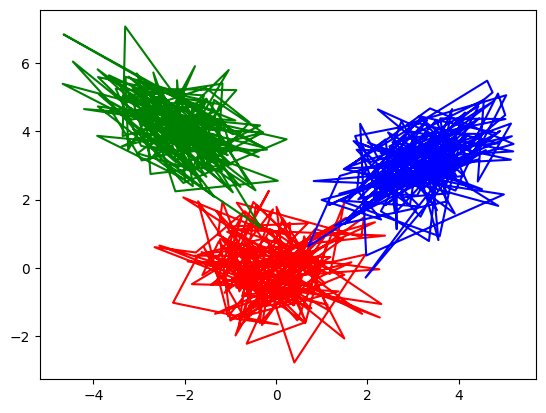

In [ ]:
plt.plot(d11,d12,'r')
plt.plot(d21,d22,'b')
plt.plot(d31,d32,'g')

In [15]:
data=files.upload()

Saving Image2.csv to Image2 (1).csv


In [16]:
df1=pd.read_csv(io.StringIO(data['Image2.csv'].decode('utf-8')))
df1.head

<bound method NDFrame.head of      Unnamed: 0         0         1
0             0  0.950088 -0.151357
1             1 -0.103219  0.410599
2             2  0.144044  1.454274
3             3  0.761038  0.121675
4             4  0.443863  0.333674
..          ...       ...       ...
595         595 -0.313163 -0.280615
596         596  2.037191 -1.447488
597         597 -0.205087 -1.757645
598         598 -1.048511  1.696479
599         599  0.379209 -1.593611

[600 rows x 3 columns]>

In [ ]:
dd1=df1.iloc[0:200,1:]
dd2=df1.iloc[200:400,1:]
dd3=df1.iloc[400:600,1:]
dd3

,0,1
400,-0.444422,0.418230
401,1.405817,-1.518283
402,0.783677,-0.138622
403,-1.205257,0.547306
404,0.462306,1.273573
...,...,...
595,-0.313163,-0.280615
596,2.037191,-1.447488
597,-0.205087,-1.757645
598,-1.048511,1.696479


In [ ]:
dd11=dd1.loc[:,'0']
dd12=dd1.loc[:,'1']
dd21=dd2.loc[:,'0']
dd22=dd2.loc[:,'1']
dd31=dd3.loc[:,'0']
dd32=dd3.loc[:,'1']
dd32

400    0.418230
401   -1.518283
402   -0.138622
403    0.547306
404    1.273573
         ...   
595   -0.280615
596   -1.447488
597   -1.757645
598    1.696479
599   -1.593611
Name: 1, Length: 200, dtype: float64

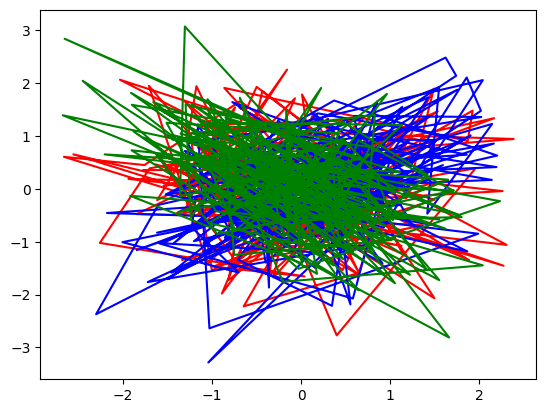

In [ ]:
plt.plot(dd11,dd12,'r')
plt.plot(dd21,dd22,'b')
plt.plot(dd31,dd32,'g')

In [ ]:
#part2
#z=StandardScaler()
#dff=z.fit_transform(x)
#EM=GaussianMixture(n_components=3)
#EM.fit(dff)
#cluster=EM.predict(dff)
#cluster_p=EM.predict_proba(dff)
#print(silhouette_score(dff,cluster))
#c=np.argmin(cluster_p,axis=1)

ValueError: ignored

In [9]:
X = np.linspace(-5,5,num=200)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above
def estep():
 """Create the array r with dimensionality nxK"""
 r = np.zeros((len(X_tot),3))  

 """Instantiate the random gaussians"""
 gauss_1 = norm(loc=-5,scale=5) 
 gauss_2 = norm(loc=8,scale=3)
 gauss_3 = norm(loc=1.5,scale=1)

 """Instantiate the random mu_c"""
 m = np.array([1/3,1/3,1/3]) # We expect to have three clusters 

 pi = m/np.sum(m)

 """
 Probability for each datapoint x_i to belong to gaussian g 
 """
 for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
     r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                          # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
 """
 Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
 cluster c
 """
 for i in range(len(r)):
     r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])

 return r 

In [10]:
#part 3
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above
def mstep():
 m_c = []
 r=estep()
 for c in range(len(r[0])):
     m = np.sum(r[:,c])
     m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
    
 """calculate pi_c"""
 pi_c = []
 for m in m_c:
     pi_c.append(m/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

 """calculate mu_c"""
 mu_c = np.sum(X_tot.reshape(len(X_tot),1)*r,axis=0)/m_c


 """calculate var_c"""
 var_c = []

 for c in range(len(r[0])):
     var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(X_tot.reshape(len(X_tot),1)-mu_c[c])).T,(X_tot.reshape(len(X_tot),1)-mu_c[c])))
 return (mu_c,var_c)
mstep()

(array([-6.90799379,  9.83350439,  0.76920436]),
 [array([[17.71694566]]), array([[4.49680163]]), array([[1.36676906]])])

In [18]:
Xz=df.iloc[:,1:]
Xt=df.to_numpy()
Xt1=Xt[:,1:]
Xz1=df1.iloc[:,1:]
Xtt=df1.to_numpy()
Xtt1=Xtt[:,1:]
Y=np.zeros(600)
for i in range(200):
  Y[i+200]=1
  Y[i+400]=2
Xt1
Xtt1

array([[ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       ...,
       [-0.20508705, -1.75764496],
       [-1.04851094,  1.69647873],
       [ 0.37920934, -1.59361072]])

[1.2162505919008416e-10, 0.25347115418874144, 0.7465288456896335]

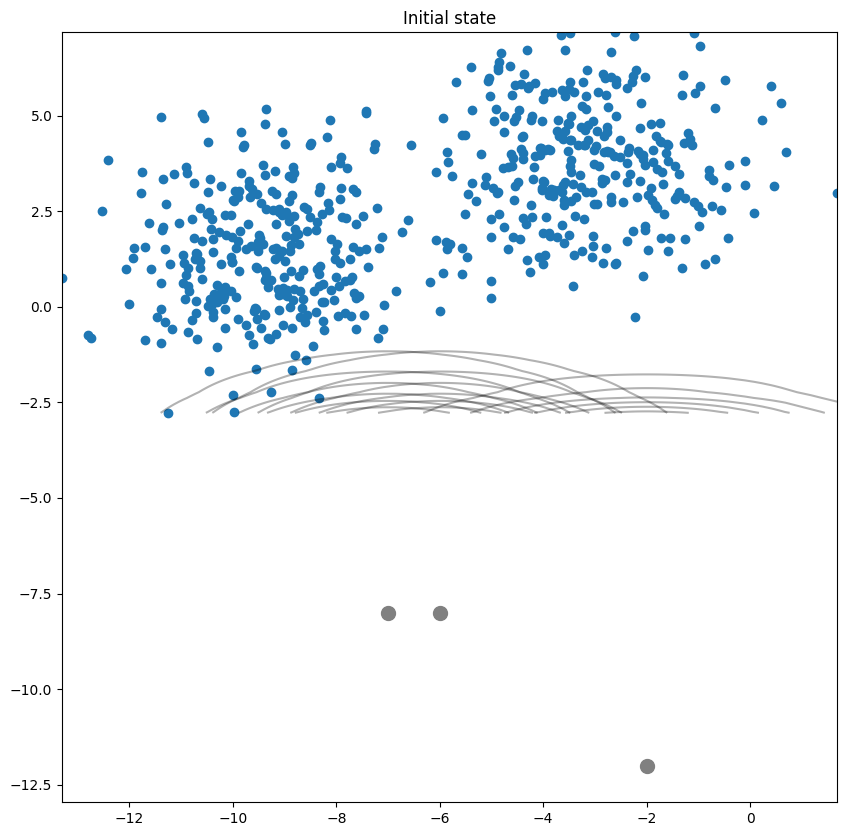

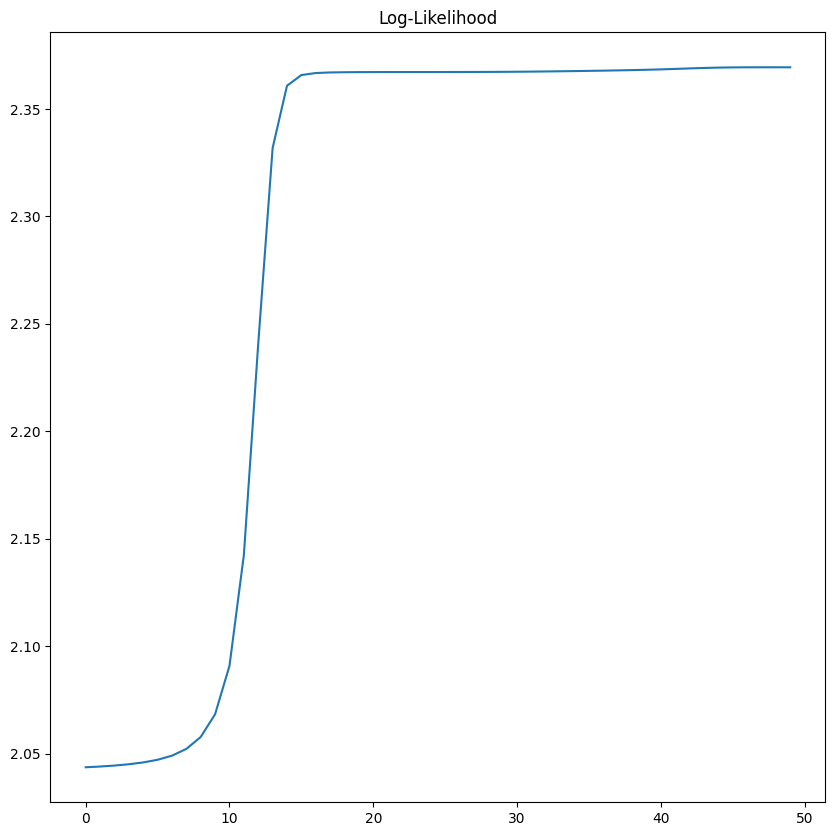

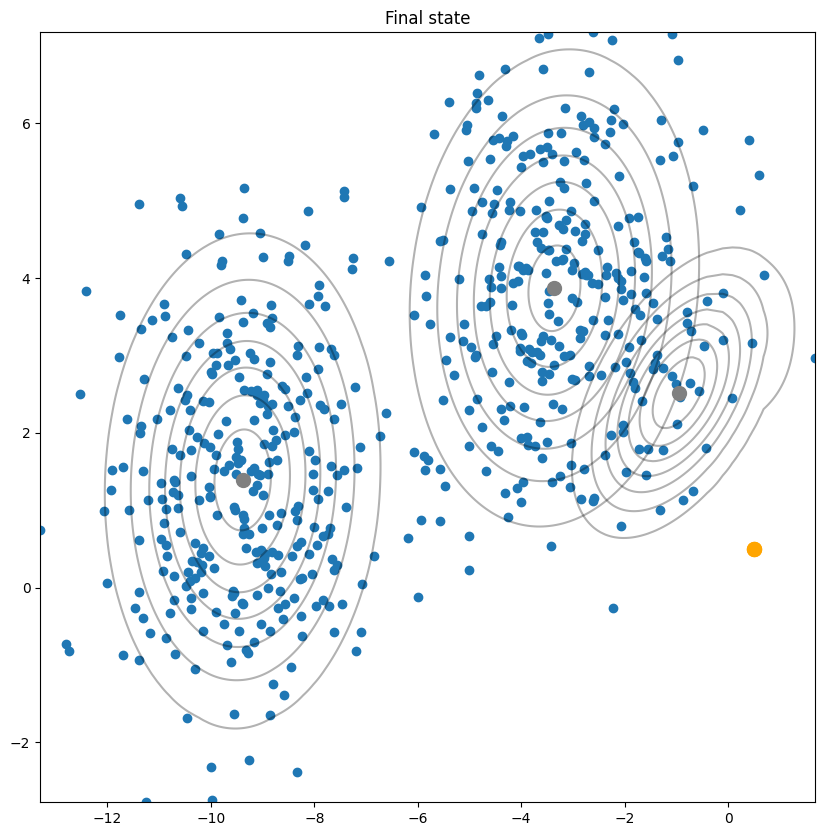

In [22]:
#part 4
# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=None,n_samples=600,centers=2)
#X=np.dot(X,np.random.RandomState(0).randn(2,2))
# Stratch dataset to get ellipsoid data




class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)


        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            
            """M Step"""

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic

            
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1

    
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

            

            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """

        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()

    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,3,50)     
GMM.run()
GMM.predict([[0.5,0.5]])

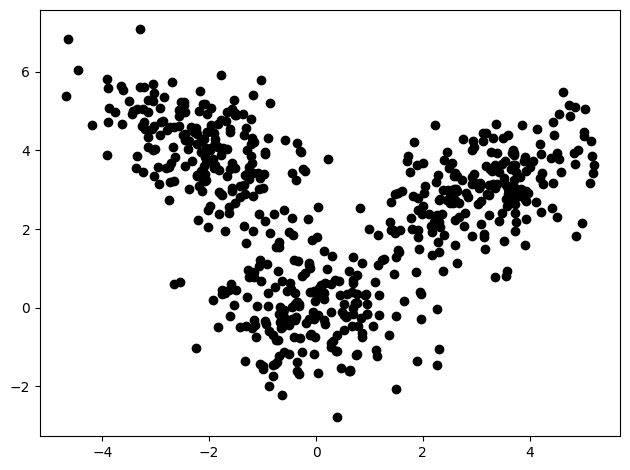

In [22]:
#PART 5
def generate_data(n_data, means, covariances, weights):
    n_clusters, n_features = means.shape
    
    data = np.zeros((n_data, n_features))
    for i in range(n_data):
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data[i] = x
   
    return data
init_means = np.array([
    [-0.1, 0],
    [3, 3],
    [-2, 4]
])

init_covariances = np.array([
    [[1,0],[0,1]],
    [[1, 0.4], [0.4,1]],
    [[0.87,-0.4], [-0.4, 0.9]]
])

init_weights = [1 / 4, 1 / 2, 1 / 4]

# generate data
np.random.seed(4)
X = generate_data(600, init_means, init_covariances, init_weights)

plt.plot(Xt1[:, 0], Xt1[:, 1], 'ko')
plt.tight_layout()



In [20]:
class GMM:

    def __init__(self, n_components: int, n_iters: int, tol: float, seed: int):
        self.n_components = n_components
        self.n_iters = n_iters
        self.tol = tol
        self.seed = seed

    def fit(self, X):

        # data's dimensionality and responsibility vector
        n_row, n_col = X.shape     
        self.resp = np.zeros((n_row, self.n_components))

        # initialize parameters
        np.random.seed(self.seed)
        chosen = np.random.choice(n_row, self.n_components, replace = False)
        self.means = X[chosen]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = self.n_components, n_col, n_col
        self.covs = np.full(shape, np.cov(X, rowvar = False))

        log_likelihood = 0
        self.converged = False
        self.log_likelihood_trace = []      

        for i in range(self.n_iters):
            log_likelihood_new = self._do_estep(X)
            self._do_mstep(X)

            if abs(log_likelihood_new - log_likelihood) <= self.tol:
                self.converged = True
                break
  
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)

        return self

    def _do_estep(self, X):
        
        self._compute_log_likelihood(X)
        log_likelihood = np.sum(np.log(np.sum(self.resp, axis = 1)))

        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return log_likelihood

    def _compute_log_likelihood(self, X):
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood

        return self

    def _do_mstep(self, X):
        """M-step, update parameters"""

        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        
        # weights
        self.weights = resp_weights / X.shape[0]

        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]
            
        return self

In [23]:
def plot_contours(data, means, covs, title):
    """visualize the gaussian components over the data"""
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T

    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])

    plt.title(title)
    plt.tight_layout()

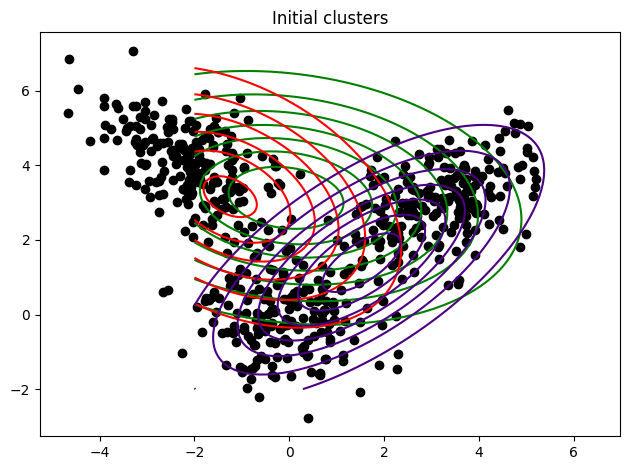

In [24]:
gmm = GMM(n_components = 3, n_iters = 1, tol = 1e-4, seed = 4)
gmm.fit(Xt1)
plot_contours(Xt1, gmm.means, gmm.covs, 'Initial clusters')

converged or not:  True


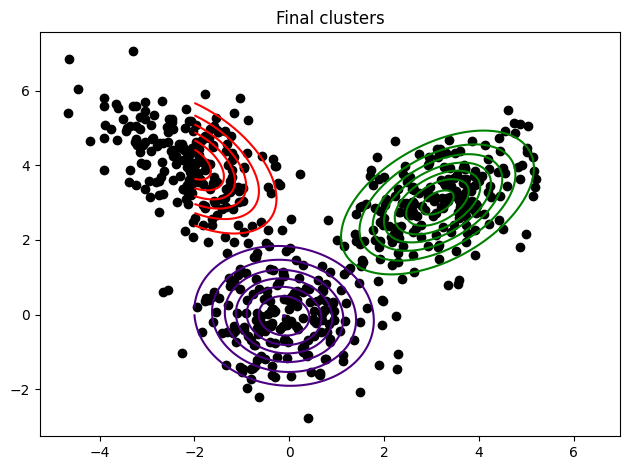

In [25]:
gmm = GaussianMixture(n_components = 3, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

gmm.fit(Xt1)

print('converged or not: ', gmm.converged_)
plot_contours(Xt1, gmm.means_, gmm.covariances_, 'Final clusters')

In [33]:
yn=gmm.fit(Xt1).predict(Xt1)
yn

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

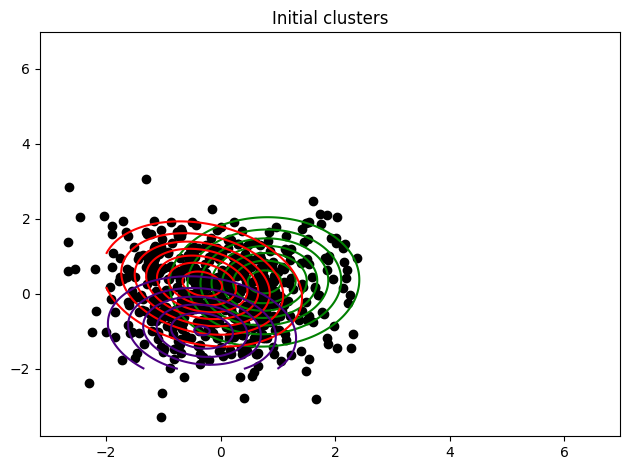

In [27]:
gmm = GMM(n_components = 3, n_iters = 1, tol = 1e-4, seed = 4)
gmm.fit(Xtt1)
plot_contours(Xtt1, gmm.means, gmm.covs, 'Initial clusters')

converged or not:  True


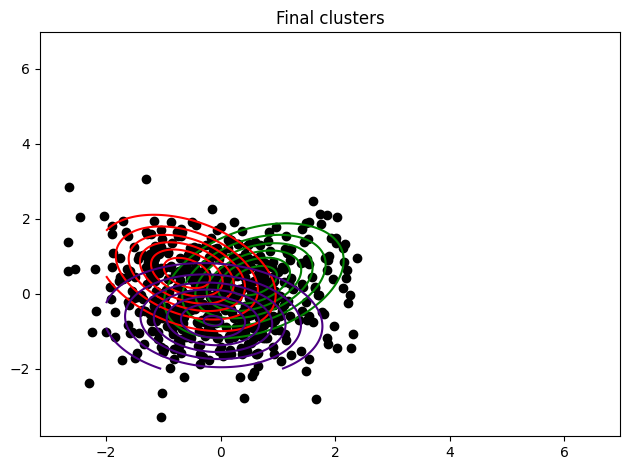

In [28]:
gmm = GaussianMixture(n_components = 3, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

gmm.fit(Xtt1)

print('converged or not: ', gmm.converged_)
plot_contours(Xtt1, gmm.means_, gmm.covariances_, 'Final clusters')

In [32]:
yn1=gmm.fit(Xtt1).predict(Xtt1)
yn1

array([0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2,